# 1. Overview
The most challenging part in Machine Learning is to select the right set of features before traning any model. Irrelevant features may hurt the performance of our predictive model while they spend computing resources. Noises these features add to the dataset lead to overfitting and increase both training and predicting time. Thus, dimensionality reduction is an important task of Data Scientists.

## 1.1. Curse of dimensionality
Generalization refers to the property of a good dataset that has several observations for each combination of feature values. [Curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality) is a phenomenom arises in a high dimensional dataset, where the number of possible values is very huge so that the dataset fails to *generalize*.

Imagine there are 10 *binary* features, then we need thousands of observations to generalize about 1000 combinations ($2^{10}=1024$). It's not hard to see that: to construct a good dataset, we are going to need millions of observations for 20 features and billions of observations for 30 features. Of course, a lot of combinations in real world data never exist, making the actual number of combinations is much smaller. However, the data size required still grows exponentially, thus this example still provides a good explanation of how dimensionality curses us.

## 1.2. Feature selection
Feature selection refers to the tasks that remove low quality data, hence keep informative features. It helps reduce noises and computational cost. Here are some feature selection techniques, they can be implemented very easily.

### Filter methods
Filter methods rely on descriptive statistics of features to decide which one to be filtered out. They are done independenly to Machine Learning algorithms.

- *Missing ratio evaluation*. Features having more than 40-50% of missing values can be dropped.

- *Low variance filtering*. Think about a constant feature, whose all observations have the same value, it has no predictive power and cannot explain the target variable. Therefore, features with very low variance can be safely removed.

- *High correlation filtering*. A pair of features having a high Pearson's correlation coefficient means they are very similar to each other, and they will bring the same information to the predictive model. Such a situation is called *multi-colinearity*, and it can mislead some Machine Learning algorithms. Therefore, only one variable in the highly correlated group should be used.

- *Chi-squared selection*. As the name states, this method uses chi-squared test of independence to determine if two features are close using their frequency distributions.

### Wrapper methods
Wrapper methods run Machine Learning algorithms on a subsets of the dataset to detect unimporatant features.

- *Feature importances analysis*. Some ML algorithms have the ability to return feature importances. For example, Linear Regression uses variable weights and Decision Tree uses sum of information gains. Feature importances express how much information features contribute on predicting the target variable. In this approach, low important features will be removed.

- *Backward feature elimination*. The idea of this technique is to fit an algorithm on all input variables and consecutively remove one feature at a time that worst reduces model score. This procedure stops when model score no longer changes.

- *Foward feature construction*. This is basically the inverse process of the previous techique, it fits model and evaluate the results untill all significant features have been visited. Both backward elimination and foward construction are greedy algorithms, therefore they are not suite for large scale data.

# 2. PCA
[PCA](https://en.wikipedia.org/wiki/Principal_component_analysis) (**P**rinciple **C**omponent **A**nalysis) is a very popular dimensionality reduction aiming to construct a new dataset having less dimensions but retains most important characteristics of the original dataset. The term *characteristic* is defined by PCA using *variance*, which means we project data so that the variance of the image is maximized. To achieve this, PCA constructs a new coordinate system, in which each axis is found so that it (1) is orthorgonal to all previous axes and (2) maximizes the variance of its image.

## 2.1  Algorithm
*Input*: A dataset having $D$ variables $\mathbf{X}=(\mathbf{x}_1,\mathbf{x}_2,\dots,\mathbf{x}_D)\in\mathbb{R}^{N\times D}$ and the number of components you expect to keep, $K$.

*Step 1*. Standardize all variables so that they are on the same scale. Then compute the covariance matrix $\mathbf{Q}\in\mathbb{R}^{D\times D}$ of the scaled variables, notice that this is a symmetric square matrix.

*Step 2*. Solve for the eigenvalues $(\lambda_1,\lambda_2,\dots,\lambda_D)$ and eigenvectors $(\mathbf{u}_1,\mathbf{u}_2,\dots,\mathbf{u}_D)$ of $\mathbf{Q}$. As the covariance matrix is symmetric, all their eigenvectors are orthogonal.

*Step 3*. Choose $K$ eigenvectors with largest eigenvalues and construct a matrix $\mathbf{W}=(\mathbf{u}_1,\mathbf{u}_2,\dots,\mathbf{u}_K)$. Notice $\mathbf{u}_k\in\mathbb{R}^{D}$, then $\mathbf{W}\in\mathbb{R}^{D\times K}$. The orthogonality of eigenvectors makes $\mathbf{W}$ a set of axes and form a new coordinate system.

*Step 4*. Project original data to the new coordinate system by computing $\mathbf{X}'=\mathbf{X}\mathbf{W}$. It turns out, the variations each new axis accounts for is quantified by the corresponding eigenvalue. Thus, $K$ eigenvectors selected in step 3 are the most important components. An effective PCA model should have most variations explained in a few first components.

## 2.2. Implementation
PCA is implemented in Scikit-learn via the classes
<code style='font-size:13px'><a href='https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html'>PCA</a></code> (full-batch processing) and
<code style='font-size:13px'><a href='https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.IncrementalPCA.html'>IncrementalPCA</a></code> (mini-batch processing).
Both classes only have a main hyperparameter:
- <code style='font-size:13px; color:#BA2121'>n_components</code>: the number of principal components to keep, defaults to *None* (keep all components). It can accept (1) an integer for the number of components, (2) a float in the range $(0,1)$ for a minimum threshold that total percentage of explained variances must be greater that, or (3) *mle* for letting PCA guess the dimension. The number of components in PCA can be determined using a scree plot.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

In [4]:
dfIris = pd.read_csv('data/iris.csv')
dfIris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
x = dfIris.drop(columns='species')
y = dfIris.species

reducer = PCA(n_components=None)
reducer = reducer.fit(x)

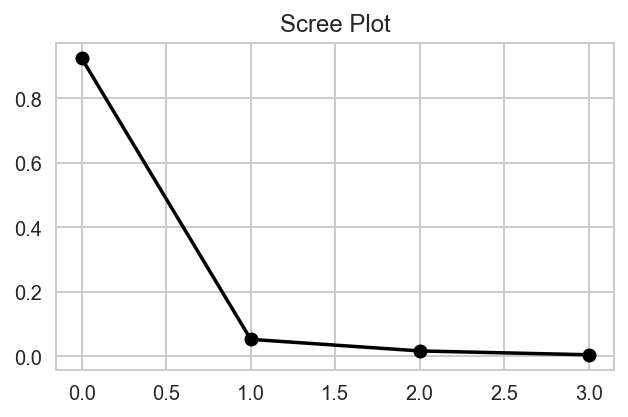

In [6]:
variances = reducer.explained_variance_ratio_
fig, ax = plt.subplots(figsize=(5,3))
ax.plot(variances, '-ok')
ax.set_title('Scree Plot')
plt.show()

In [10]:
# eigenvectors
reducer.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

Looking at the scree plot, the explained variances drops significantly right after the first component (PC1). This means, we only need to keep PC1, as it's very good at retaining the most characteristics of the Iris dataset. PC1 is constructed by:

$$\text{PC1}=0.36\cdot\text{sepalLength}-0.08\cdot\text{sepalWidth}+0.85\cdot\text{petalLength}+0.35\cdot\text{petalWidth}$$

To further verify the performance of PC1, we color each flower by its species (this field was not used in training PCA).

In [7]:
xTransformed = reducer.transform(x)
pcNames = [f'PC{i+1}' for i in range(xTransformed.shape[1])]
xTransformed = pd.DataFrame(xTransformed, columns=pcNames)
xTransformed.head()

,PC1,PC2,PC3,PC4
0,-2.684126,0.319397,-0.027915,-0.002262
1,-2.714142,-0.177001,-0.210464,-0.099027
2,-2.888991,-0.144949,0.017900,-0.019968
3,-2.745343,-0.318299,0.031559,0.075576
4,-2.728717,0.326755,0.090079,0.061259


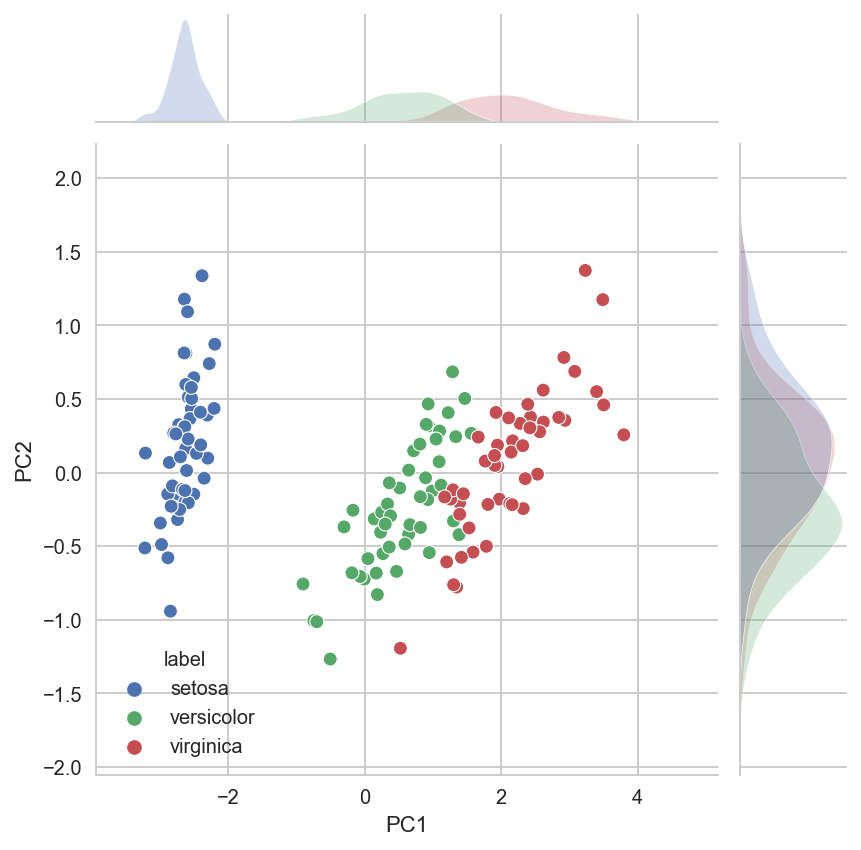

In [8]:
dfTransformed = xTransformed.assign(label=y)
sns.jointplot(data=dfTransformed, x='PC1', y='PC2', hue='label', marginal_kws={'edgecolor':'w'})
plt.show()

# 3. LDA
[LDA](https://en.wikipedia.org/wiki/Linear_discriminant_analysis) (**L**inear **D**iscriminant **A**nalysis) is a supervised dimensionality reduction algorithm. Its ultimate goal is to map data to a new space so that classes are most *discriminant*, which can be achieved via (1) maximizing between-class variances and (2) minimizing within-class variances.

## 3.1. Algorithm
LDA can be performed in various ways, where a simple method is applying eigendecomposition.

*Input*:
- A dataset of size $N\times D$, divided into $M$ classes: $\mathcal{C}_1,\mathcal{C}_2,\dots,\mathcal{C}_M$
- The number of components you expect to keep, $K$
- Notation:
    - $\mathbf{o}_i$ is the index of an observation belongs to a class
    - $\bar{\mathbf{o}}_m$ is the mean vector of class $\mathcal{C}_m$
    - $\bar{\mathbf{o}}$ is the overall mean vector

*Step 1*: Compute the within-class scatter matrix, $\mathbf{S}_\text{W}\in\mathbb{R}^{D\times D}$, by taking the sum of scatter matrices of all classes.

$$\mathbf{S}_\text{W}=\sum_{m=1}^{M}\sum_{\mathbf{o}_i\in\mathcal{C}_m}^{}{(\mathbf{o}_i-\bar{\mathbf{o}}_m)(\mathbf{o}_i-\bar{\mathbf{o}}_m)^\text{T}}$$

*Step 2*: Compute the between-class scatter matrix, $\mathbf{S}_\text{B}\in\mathbb{R}^{D\times D}$

$$\mathbf{S}_\text{B}=\sum_{m=1}^{M}{N_m}(\bar{\mathbf{o}}_m-\bar{\mathbf{o}})(\bar{\mathbf{o}}_m-\bar{\mathbf{o}})^\text{T}$$

*Step 3*: Solve the generalized eigenvalue problem for $\mathbf{S}_\text{W}^{-1}\mathbf{S}_\text{B}$ to obtain its eigenvalues $(\lambda_1,\lambda_2,\dots,\lambda_D)$ and eigenvectors $(\mathbf{u}_1,\mathbf{u}_2,\dots,\mathbf{u}_D)$.

*Step 4*. Choose $K$ eigenvectors with largest eigenvalues and construct a transformation matrix $\mathbf{W}=(\mathbf{u}_1,\mathbf{u}_2,\dots,\mathbf{u}_K)$ of new axes. Then project original data to the new coordinate system by computing $\mathbf{X}'=\mathbf{X}\mathbf{W}$. Recall steps 3 and 4 of PCA.

## 3.2. Implementation
Scikit-learn implements LDA and QDA via the classes
<code style='font-size:13px'><a href='https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html'>LinearDiscriminantAnalysis</a></code> and
<code style='font-size:13px'><a href='https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html'>QuadraticDiscriminantAnalysis</a></code>.
They have only one hyperparameter like PCA:
- <code style='font-size:13px; color:#BA2121'>n_components</code>: the number of principal components to keep, defaults to *None* (keep all components)

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

In [12]:
dfIris = pd.read_csv('data/iris.csv')
x = dfIris.drop(columns='species')
y = dfIris.species
dfIris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [25]:
reducer = LDA(n_components=None)
reducer = reducer.fit(x, y)

In [16]:
reducer.explained_variance_ratio_

array([0.9912126, 0.0087874])

In [27]:
xTransformed = reducer.transform(x)
ldNames = [f'LD{i+1}' for i in range(xTransformed.shape[1])]
xTransformed = pd.DataFrame(xTransformed, columns=ldNames)
xTransformed.head()

,LD1,LD2
0,8.061800,0.300421
1,7.128688,-0.786660
2,7.489828,-0.265384
3,6.813201,-0.670631
4,8.132309,0.514463


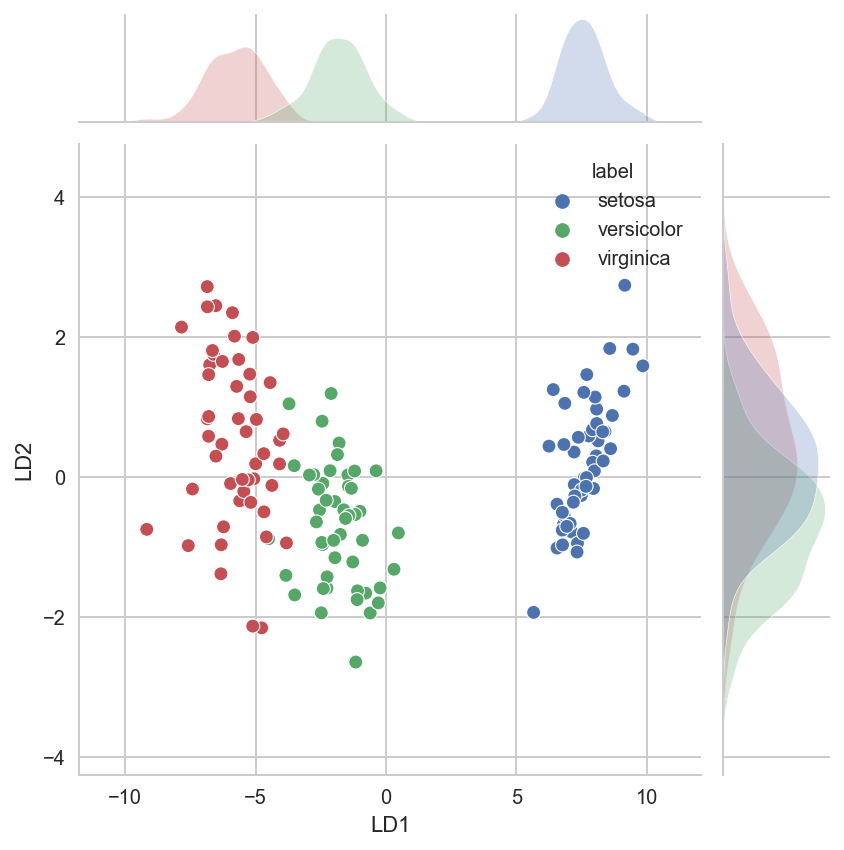

In [28]:
dfTransformed = xTransformed.assign(label=y)
sns.jointplot(data=dfTransformed, x='LD1', y='LD2', hue='label', marginal_kws={'edgecolor':'w'})
plt.show()

# 4. t-SNE

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

import warnings; warnings.filterwarnings('ignore')

In [30]:
dfIris = pd.read_csv('data/iris.csv')
x = dfIris.drop(columns='species')
y = dfIris.species
dfIris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [42]:
reducer = TSNE(n_components=2, )
xTransformed = reducer.fit_transform(x)
ldNames = [f'EV{i+1}' for i in range(xTransformed.shape[1])]
xTransformed = pd.DataFrame(xTransformed, columns=ldNames)
xTransformed.head()

,EV1,EV2
0,-10.932996,-22.602758
1,-10.393078,-20.270414
2,-10.916204,-19.819124
3,-11.214849,-19.595716
4,-10.536572,-22.682528


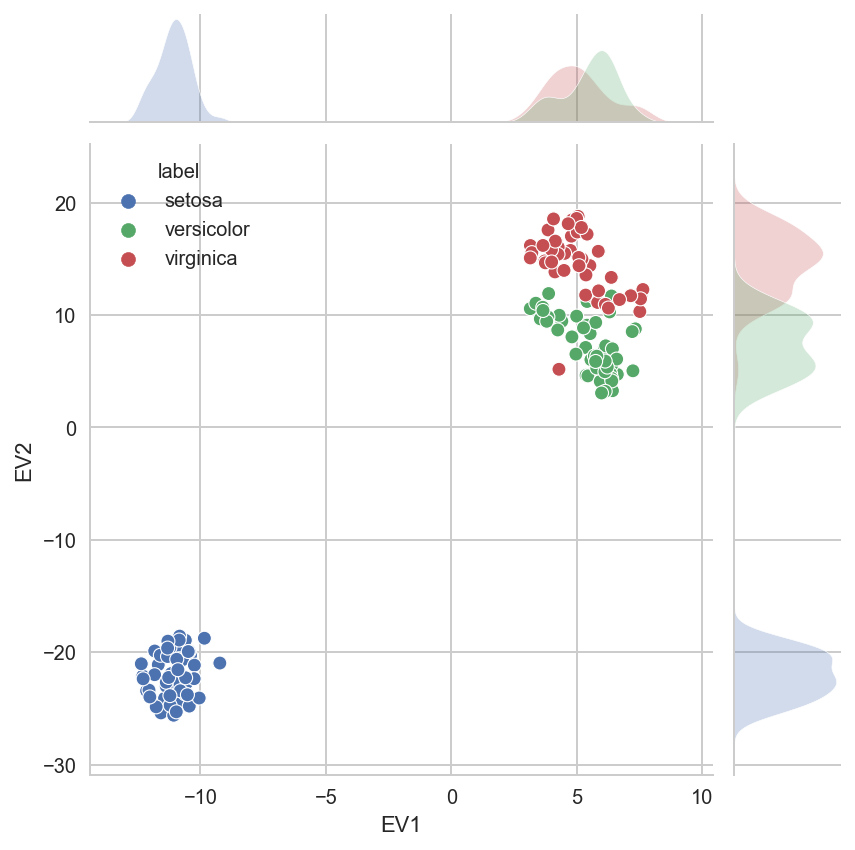

In [44]:
dfTransformed = xTransformed.assign(label=y)
sns.jointplot(data=dfTransformed, x='EV1', y='EV2', hue='label', marginal_kws={'edgecolor':'w'})
plt.show()

---
*&#9829; By Quang Hung x Thuy Linh &#9829;*